In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
data = pd.read_csv('/Users/oscarcortes/Downloads/diabetes_indiana.csv')

In [3]:
# Dividir características y etiquetas
X = data.iloc[:, 1:9]  # Características
y = data.iloc[:, 9]    # Etiquetas

In [4]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

In [6]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [8]:
# Métricas de evaluación
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

[[77 22]
 [21 34]]


In [10]:
from sklearn.model_selection import GridSearchCV

# Definir los valores de los hiperparámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [12]:
# Obtener el mejor modelo después de la optimización
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# Mostrar métricas de evaluación con los mejores hiperparámetros
print("Evaluación del Modelo con los Mejores Hiperparámetros:")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Evaluación del Modelo con los Mejores Hiperparámetros:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154

[[77 22]
 [19 36]]


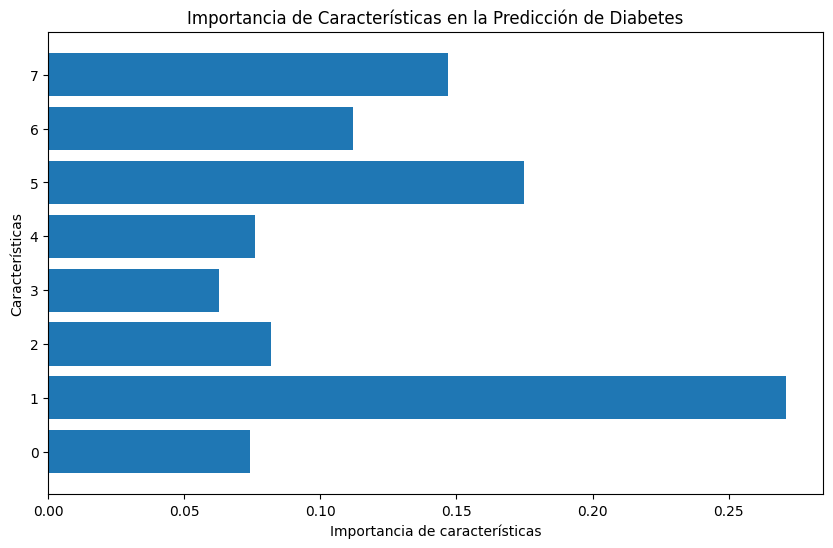

In [15]:
# Crear una gráfica personalizada para mostrar la importancia de las características
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importancia de características')
plt.ylabel('Características')
plt.title('Importancia de Características en la Predicción de Diabetes')
plt.show()
